In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 97% 63.0M/65.2M [00:04<00:00, 21.4MB/s]
100% 65.2M/65.2M [00:04<00:00, 15.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Changed keras.models to tensorflow.keras.models
from tensorflow.keras.layers import Dense, Dropout, Flatten # Changed keras.layers to tensorflow.keras.layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation # Changed keras.layers to tensorflow.keras.layers
from tensorflow.keras.optimizers import Adam # Changed keras.optimizers to tensorflow.keras.optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed keras.preprocessing.image to tensorflow.keras.preprocessing.image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [8]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [10]:
valid_generator=validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 432,135 (1.65 MB)

 Trainable params: 430,791 (1.64 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(train_generator,epochs=50,validation_data=valid_generator)

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.4721 - loss: 1.3779 - val_accuracy: 0.5039 - val_loss: 1.2810
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.4766 - loss: 1.3695 - val_accuracy: 0.5065 - val_loss: 1.2833
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.4839 - loss: 1.3563 - val_accuracy: 0.5177 - val_loss: 1.2517
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 46s 82ms/step - accuracy: 0.4781 - loss: 1.3553 - val_accuracy: 0.5206 - val_loss: 1.2504
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.4929 - loss: 1.3397 - val_accuracy: 0.5251 - val_loss: 1.2420
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 37s 81ms/step - accuracy: 0.4860 - loss: 1.3420 - val_accuracy: 0.5093 - val_loss: 1.2837
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.4923 - loss: 1.3307 - val_accuracy: 0.5269 - val_loss: 1.2346
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.4974 - loss: 1.3193 - 

In [17]:
loss, accuracy = model.evaluate(valid_generator)
print(f"Model accuracy: {accuracy:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.5695 - loss: 1.1233
Model accuracy: 0.57


In [18]:
# Save model in HDF5 format
model.save('Emotion_detection_model.h5')


In [43]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [20]:
model = load_model('Emotion_detection_model.h5')

In [21]:
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [29]:
labels=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [51]:
# Load your image and convert it to grayscale
# Example image loading, replace with your actual image or video frame
image_path = '/content/sad.jpeg'  # Replace with the actual path to your image
frame = cv2.imread(image_path)

# Convert the image to grayscale (since the model expects grayscale input)
gray_scale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Face detection using Haar cascades (or your preferred face detection method)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_scale, scaleFactor=1.1, minNeighbors=5)

print(f"Detected {len(faces)} face(s)")


Detected 1 face(s)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Emotion: Neutral


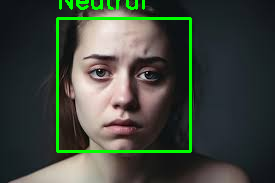

In [52]:

for x, y, w, h in faces:

    face_roi = gray_scale[y:y+h, x:x+w]


    face_roi = cv2.resize(face_roi, (48, 48))


    face_roi = face_roi.reshape(1, 48, 48, 1)


    face_roi = face_roi / 255.0


    prediction = model.predict(face_roi)
    label = labels[np.argmax(prediction)]


    print(f"Emotion: {label}")


    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)


    cv2_imshow(frame)


    break


In [36]:

cv2.destroyAllWindows()